# MAXIMIZAR función x/(2x^2+3y^2+1)
mucho cuidado porque la consigna aveces dice maximizar y otras veces dice de minimizar 

gradiente = grad_x, grad_y

grad_x = (-2x^2+3y^2+1)/((2x^2+3y^2+1)^2)

grad_y = (-6xy)/((2x^2+3y^2+1)^2)

In [83]:
import numpy as np
from matplotlib import pylab as plt
import grafica_Grad as gr
import math
import io

# Iniciar en un punto aleatorio del dominio de la función
x = -math.sqrt(0.5)
y = 0


# Mucho ciudado con los valores iniciales que elijo para x e y, ya que si mi función es cuadrática puedo terminar obteniendo valores muy muy elevados

In [84]:
# PARAMETROS
alfa = 0.5  # proporción del gradiente a utilizar para modificar la posición actual
MAX_ITE = 100  # máxima cantidad de "pasos"
Cota_ERROR = 10e-6

In [85]:
ite = 0
z_new = x/(2*x**2+3*y**2+1)
#z = z_new + Cota_ERROR * 10
z = 1

puntos = []
diferencia = []
valorZ = [z_new]
while ((ite<MAX_ITE) and (np.abs(z - z_new)>Cota_ERROR)):
    z = z_new
    PtoAnt = [x, y, z]#para el gráfico 3d

    grad_x = (-2*x**2+3*y**2+1)/((2*x**2+3*y**2+1)**2)   # derivada respecto de x
    grad_y = (-6*x*y)/((2*x**2+3*y**2+1)**2)    # derivada respecto de y
    
    x = x + alfa * grad_x #sumamos porque ahora queremos ir en la dirección del gradiente
    y = y + alfa * grad_y
    print(x)
    z_new = x/(2*x**2+3*y**2+1)
    
    #para los gráficos 2d
    diferencia.append( np.abs(z - z_new) )
    valorZ.append(z_new)
    
    #para los gráficos 3d
    #gr.graficarPaso(PtoAnt, [x, y, z_new], h)
    puntos.append([PtoAnt, [x, y, z_new]])
    
    ite = ite + 1
    

-0.7071067811865476


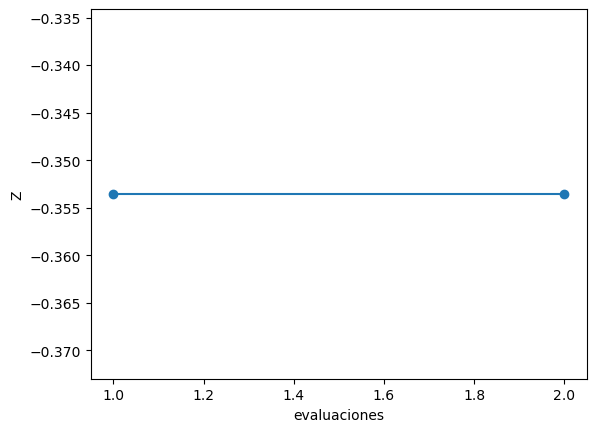

In [86]:
# El valor de la función debe ir creciendo porque estamos maximizando
plt.plot(range(1, len(valorZ) + 1), valorZ, marker='o')
plt.xlabel('evaluaciones')
plt.ylabel('Z')
plt.show()

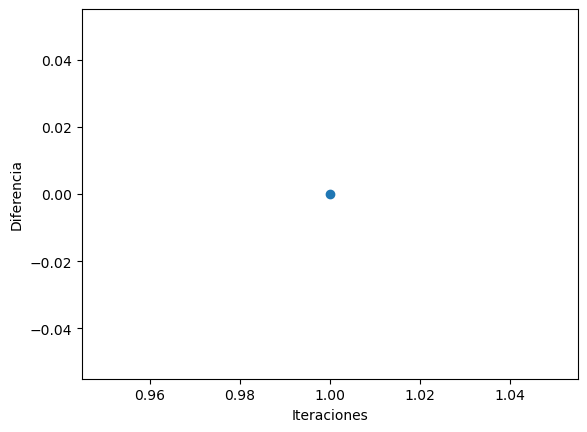

In [87]:
# La diferencia entre 2 valores consecutivos de la función debería seguir creciendo porque estamos maximizando
plt.plot(range(1, len(diferencia) + 1), diferencia, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Diferencia')
plt.show()


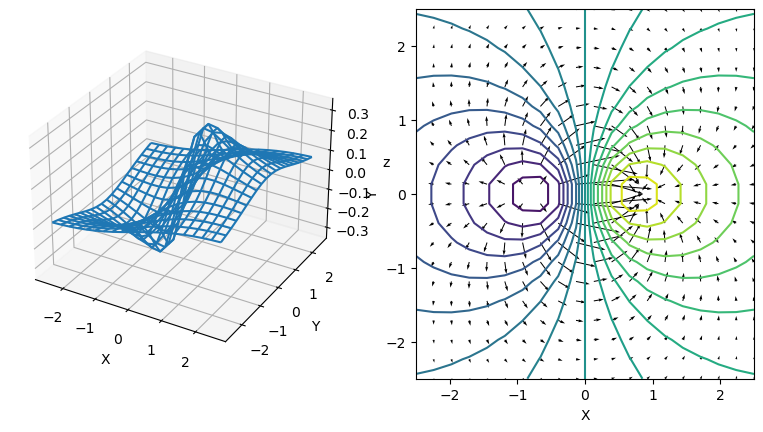

In [88]:
X = np.linspace(-2.5,2.5,num=20)
Y = np.linspace(-2.5,2.5,num=20)
X, Y = np.meshgrid(X,Y)
Z =  X/(2*X**2+3*Y**2+1) #usar X  e Y, no x e y
etiquetas = ['X', 'Y', 'z']

fig = plt.figure(figsize=plt.figaspect(0.5))
#fig=plt.figure(figsize=(7, 3))
#gs = gridspec.GridSpec(6,11)

ax = fig.add_subplot(1, 2, 1, projection='3d')
#ax = fig.add_subplot(gs[:,0:6], projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel(etiquetas[0])
ax.set_ylabel(etiquetas[1])
ax.set_zlabel(etiquetas[2]);

ax1 = fig.add_subplot(1, 2, 2)
#ax = fig.add_subplot(gs[1:4,8:11])
ph, pr = np.gradient(Z,0.05,0.05)
ax1.contour(X,Y,Z,20)
ax1.quiver(X,Y,pr,ph)
ax1.set_xlabel(etiquetas[0])
ax1.set_ylabel(etiquetas[1])
# xPos = ax1.get_xlim()
# yPos = ax1.get_ylim()
# aux = plt.text((xPos[1]+xPos[0])*0.5,(yPos[1]+yPos[0])*0.5,'*CLICK AQUI*', horizontalalignment='center',fontsize = 9);

plt.show()
# coord = plt.ginput(1);
# aux.remove()

#return([coord[0][0], coord[0][1], [ax, ax1]])      


In [89]:
print(f"el máximo es ({x}, {y}, {z})")

el máximo es (-0.7071067811865476, 0.0, -0.3535533905932738)


# Resultados:
- Punto de inicio: (𝑥 = −√0.5, 𝑦 = 0) ; alfa = 0.5; el máximo es (-0.7071067811865476, 0.0, -0.3535533905932738)
- Punto de inicio: (𝑥 = −0.5, 𝑦 = 2.0) ; alfa = 0.5; el máximo es (0.710298298426521, 3.752886793012969e-05, 0.35354492557558986)
- Punto de inicio: (𝑥 = 1.5, 𝑦 = 1.5) ; alfa = 0.05; el máximo es (1.5387519170112782, 0.9713989668678704, 0.17887609120038064)

# Conclusiones:
Es muy importante saber elegir el punto de inicio de la función, ya que nos puede llevar a valores incorrectos. La mejor configuración es la segunda